In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import find_peaks

In [24]:
ODMR_data = pd.read_csv('ODMR_with_field_V1.csv')
current_data = ODMR_data["Current"]
frequency_data = ODMR_data["Frequency"]
Signal_data = ODMR_data["Signal"]


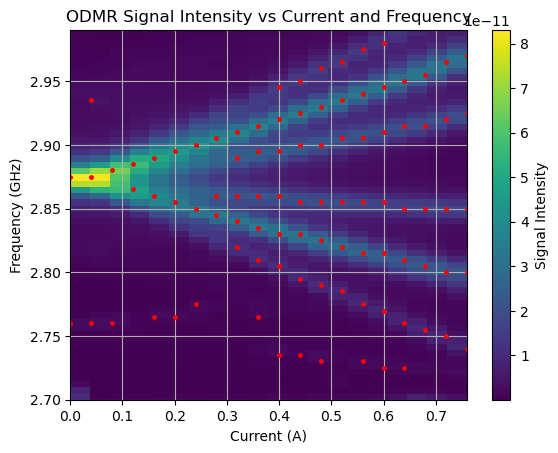

In [26]:
# Extract unique axis values
currents = np.sort(ODMR_data["Current"].unique())
frequencies = np.sort(ODMR_data["Frequency"].unique())

# Pivot to 2D array: rows = Frequency, columns = Current
Signal_grid = ODMR_data.pivot(index="Frequency", columns="Current", values="Signal").values

# --- Peak detection along each column (i.e., frequency sweep per current) ---
for col_idx, current in enumerate(currents):
    signal_slice = Signal_grid[:, col_idx]
    peaks, _ = find_peaks(signal_slice, prominence=1e-12)  # adjust as needed
    # Plot peaks as red dots
    peak_freqs = frequencies[peaks]
    plt.plot([current] * len(peak_freqs), peak_freqs, 'r.', markersize=5)

# Plot the heatmap
plt.imshow(Signal_grid, aspect='auto', origin='lower',
           extent=[currents.min(), currents.max(), frequencies.min(), frequencies.max()])
plt.colorbar(label='Signal Intensity')
plt.xlabel('Current (A)')
plt.ylabel('Frequency (GHz)')
plt.title('ODMR Signal Intensity vs Current and Frequency')
plt.grid(True)
plt.show()

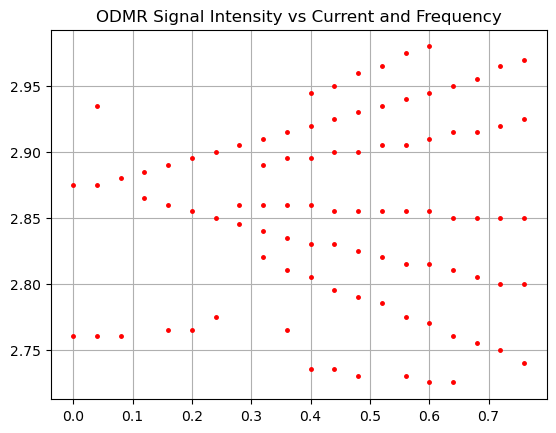

In [27]:
# Extract unique axis values
currents = np.sort(ODMR_data["Current"].unique())
frequencies = np.sort(ODMR_data["Frequency"].unique())

# Pivot to 2D array: rows = Frequency, columns = Current
Signal_grid = ODMR_data.pivot(index="Frequency", columns="Current", values="Signal").values

# --- Peak detection along each column (i.e., frequency sweep per current) ---
for col_idx, current in enumerate(currents):
    signal_slice = Signal_grid[:, col_idx]
    peaks, _ = find_peaks(signal_slice, prominence=1e-12)  # adjust as needed
    # Plot peaks as red dots
    peak_freqs = frequencies[peaks]
    plt.plot([current] * len(peak_freqs), peak_freqs, 'r.', markersize=5)

# # Plot the heatmap
# plt.imshow(Signal_grid, aspect='auto', origin='lower',
#            extent=[currents.min(), currents.max(), frequencies.min(), frequencies.max()])
# plt.colorbar(label='Signal Intensity')
# plt.xlabel('Current (A)')
# plt.ylabel('Frequency (GHz)')
plt.title('ODMR Signal Intensity vs Current and Frequency')
plt.grid(True)
plt.show()

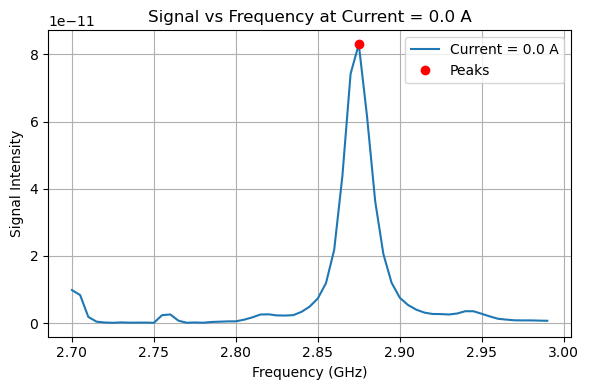

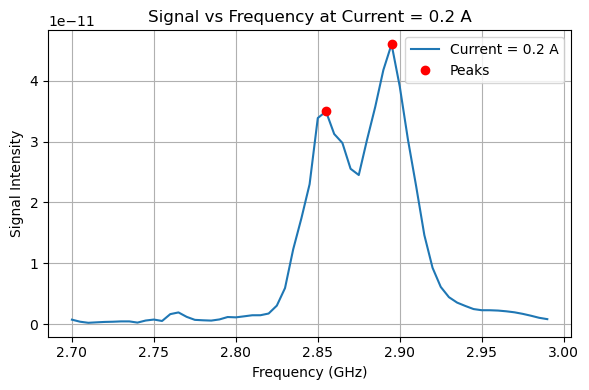

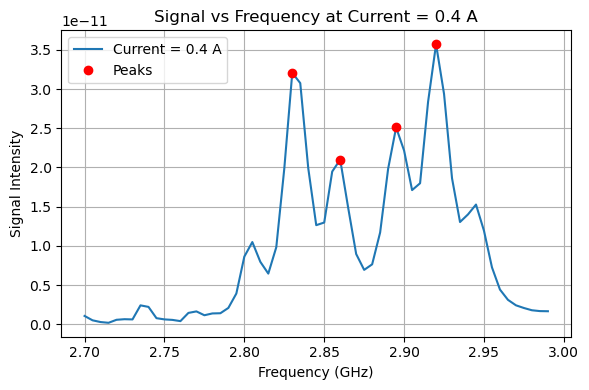

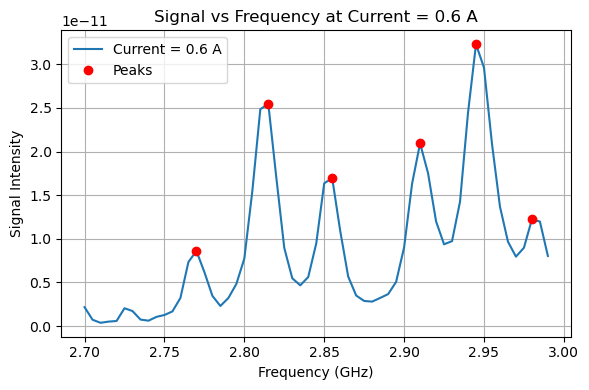

In [28]:
# Choose which current values to plot
selected_currents = [0.0, 0.2, 0.4, 0.6]  # adjust as needed based on what's in the data

# Plot signal vs frequency for each selected current
for current in selected_currents:
    # if current not in signal_grid.columns:
    #     print(f"Current {current} A not in dataset, skipping.")
    #     continue

    # Find the column index corresponding to the current value
    col_idx = np.where(currents == current)[0][0]
    signal_slice = Signal_grid[:, col_idx]
    peaks, _ = find_peaks(signal_slice, prominence=0.5 * np.std(signal_slice))

    plt.figure(figsize=(6, 4))
    plt.plot(frequencies, signal_slice, label=f'Current = {current} A')
    plt.plot(frequencies[peaks], signal_slice[peaks], 'ro', label='Peaks')
    plt.xlabel('Frequency (GHz)')
    plt.ylabel('Signal Intensity')
    plt.title(f'Signal vs Frequency at Current = {current} A')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()